In [0]:
import pandas as pd
import numpy as np
confirmed_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
death_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
census_raw = pd.read_csv('https://raw.githubusercontent.com/GabrielBG010/Covid-County-Clustering/master/census_usa.csv')

confirmed_raw = confirmed_raw.set_index('FIPS')
death_raw = death_raw.set_index('FIPS')
census_raw = census_raw.set_index('fips')

In [0]:
death = death_raw.drop(death_raw.columns[[0,1,2,3,5,6,7,8,9,10,11]], axis = 1 )

mean_death = death.T.mean()

confirmed = confirmed_raw.drop(confirmed_raw.columns[[0,1,2,3,5,6,7,8,9,10,11]], axis = 1 )

mean_confirmed = confirmed.T.mean()

In [0]:
census = census.reset_index().dropna().set_index('fips')

In [0]:
death.reset_index().dropna()

In [0]:
death = death_raw.drop(death_raw.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis = 1 )
death = death.reset_index().dropna()
death = death.astype({'FIPS': 'int32'})
death = death.set_index('FIPS')
d3 =  pd.DataFrame(death.T.diff().rolling(3).mean().mean(),columns=['d3'])
d7 =  pd.DataFrame(death.T.diff().rolling(7).mean().mean(),columns=['d7'])
d14 = pd.DataFrame(death.T.diff().rolling(14).mean().mean(),columns=['d14'])

In [0]:
confirmed = confirmed_raw.drop(confirmed_raw.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis = 1 )
confirmed = confirmed.reset_index().dropna()
confirmed = confirmed.astype({'FIPS': 'int32'})
confirmed = confirmed.set_index('FIPS')
c3 =  pd.DataFrame(confirmed.T.diff().rolling(3).mean().mean(),columns=['c3'])
c7 =  pd.DataFrame(confirmed.T.diff().rolling(7).mean().mean(),columns=['c7'])
c14 = pd.DataFrame(confirmed.T.diff().rolling(14).mean().mean(),columns=['c14'])

In [0]:
df = census.join(d3).join(d7).join(d14).join(c3).join(c7).join(c14).drop(columns=['name_x'])

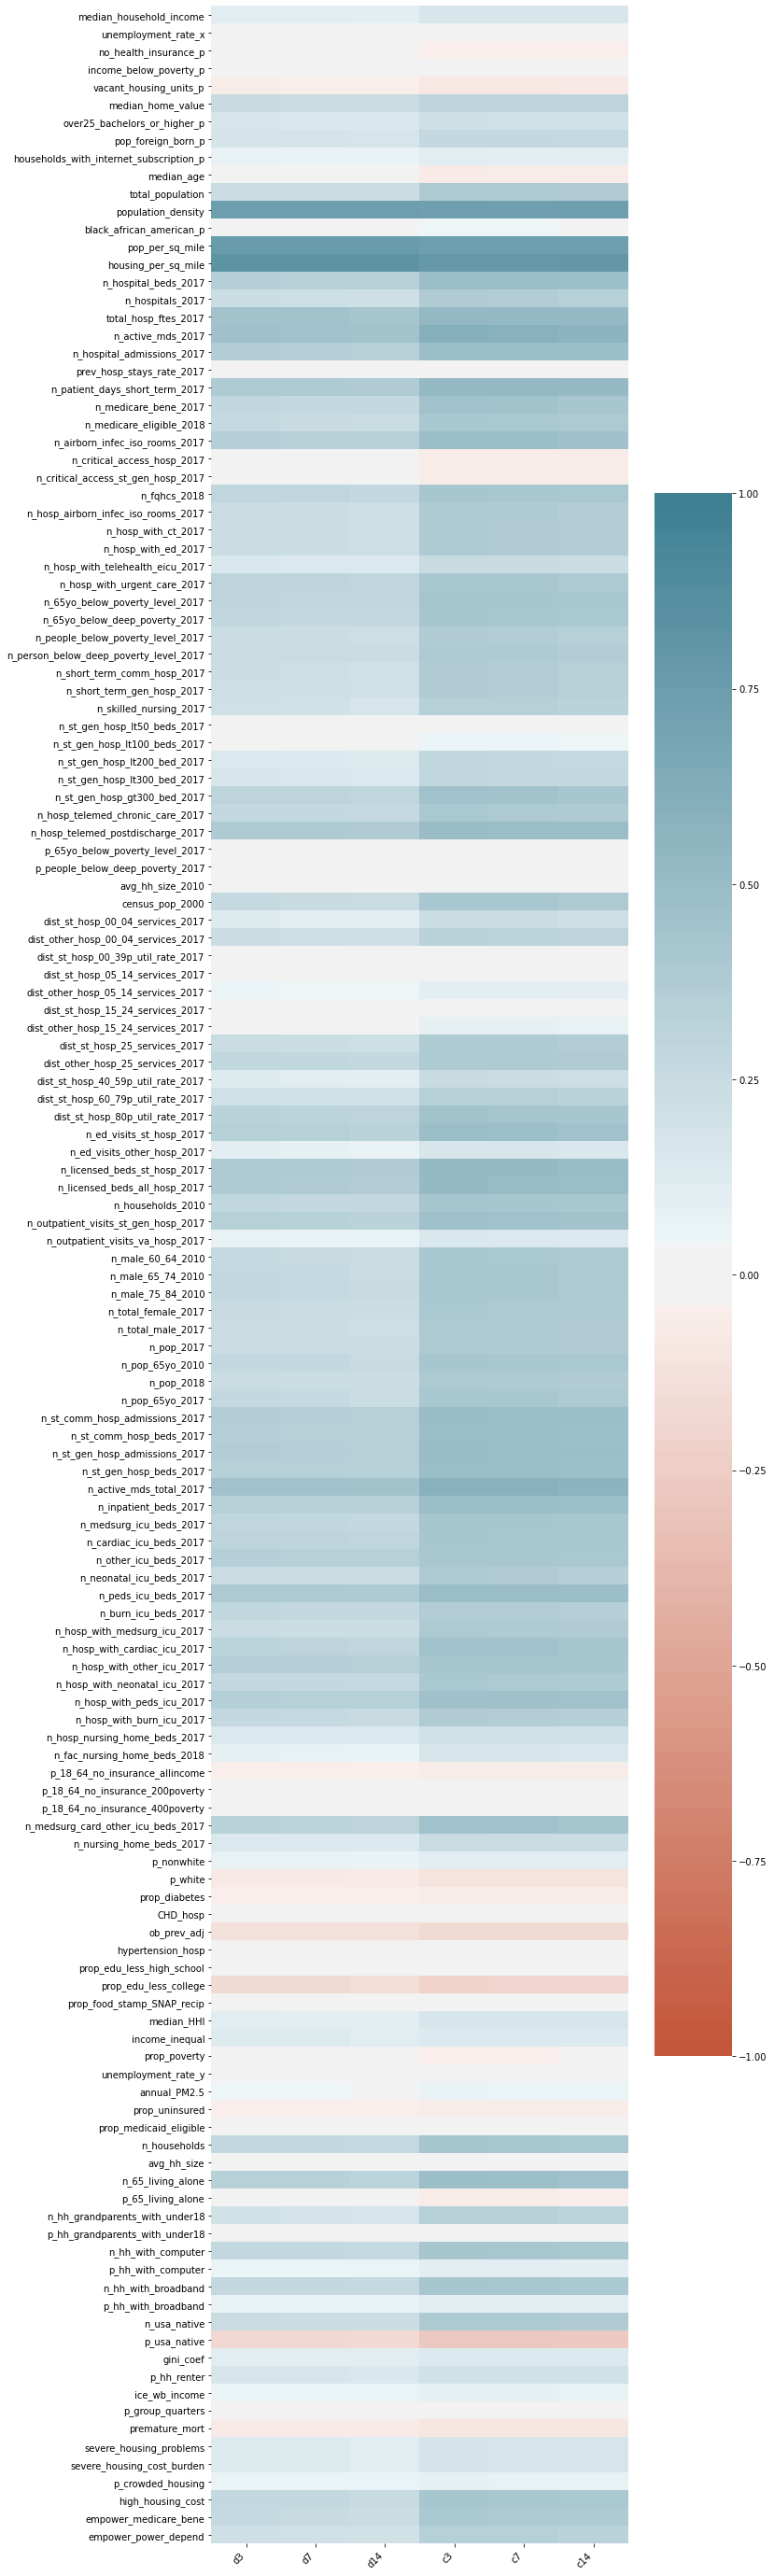

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

fig, ax = plt.subplots(figsize=(10,50))

ax = sns.heatmap(
    corr.iloc[:-7,-6:], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [281]:
df

,median_household_income,unemployment_rate_x,no_health_insurance_p,income_below_poverty_p,vacant_housing_units_p,median_home_value,over25_bachelors_or_higher_p,pop_foreign_born_p,households_with_internet_subscription_p,median_age,total_population,population_density,black_african_american_p,pop_per_sq_mile,housing_per_sq_mile,n_hospital_beds_2017,n_hospitals_2017,total_hosp_ftes_2017,n_active_mds_2017,n_hospital_admissions_2017,prev_hosp_stays_rate_2017,n_patient_days_short_term_2017,n_medicare_bene_2017,n_medicare_eligible_2018,n_airborn_infec_iso_rooms_2017,n_critical_access_hosp_2017,n_critical_access_st_gen_hosp_2017,n_fqhcs_2018,n_hosp_airborn_infec_iso_rooms_2017,n_hosp_with_ct_2017,n_hosp_with_ed_2017,n_hosp_with_telehealth_eicu_2017,n_hosp_with_urgent_care_2017,n_65yo_below_poverty_level_2017,n_65yo_below_deep_poverty_2017,n_people_below_poverty_level_2017,n_person_below_deep_poverty_level_2017,n_short_term_comm_hosp_2017,n_short_term_gen_hosp_2017,n_skilled_nursing_2017,...,prop_edu_less_high_school,prop_edu_less_college,prop_food_stamp_SNAP_recip,median_HHI,income_inequal,prop_poverty,unemployment_rate_y,annual_PM2.5,prop_uninsured,prop_medicaid_eligible,n_households,avg_hh_size,n_65_living_alone,p_65_living_alone,n_hh_grandparents_with_under18,p_hh_grandparents_with_under18,n_hh_with_computer,p_hh_with_computer,n_hh_with_broadband,p_hh_with_broadband,n_usa_native,p_usa_native,gini_coef,p_hh_renter,ice_wb_income,p_group_quarters,premature_mort,severe_housing_problems,severe_housing_cost_burden,p_crowded_housing,high_housing_cost,empower_medicare_bene,empower_power_depend,deaths,d3,d7,d14,c3,c7,c14
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28151,30834,15.1,18.2,33.3,15.2,74700,18.8,1.4,62.3,36.9,47086,0.25,72.0,70.6,30.0,39,1,101,59,357,6877.0,0,7614.0,10944.0,0,0,0,4.0,0,0,0,0,0,1114,173,15987,7805,0,0,5.0,...,21.2,81.0,41.1,30.2,0.538,34.2,7.3,10.1,14.2,44.7,18299.0,2.54,2228.0,12.2,1951.0,10.661785,13858.0,75.7,11395.0,62.3,46444.0,98.6,0.5328,46.0,-0.302694,0.011490,13645.531970,0.198406,0.195922,2.739876,6238.0,9841.0,688.0,0,0.028302,0.029412,0.031579,0.761905,0.780764,0.829787
28111,39007,6.8,15.1,18.7,18.8,83700,11.0,0.3,64.5,40.9,12028,0.07,19.7,18.9,8.5,22,1,0,3,125,6824.0,1084,2272.0,3109.0,1,1,1,6.0,1,1,1,0,0,424,70,2377,1030,1,1,1.0,...,19.3,89.4,18.4,38.1,0.471,21.4,6.4,9.6,17.1,27.3,4563.0,2.61,624.0,13.7,425.0,9.314048,3552.0,77.8,2943.0,64.5,11990.0,99.7,0.4818,16.6,-0.003287,0.010476,11161.921160,0.110478,0.077965,4.066131,1045.0,2426.0,199.0,0,0.009434,0.009804,0.010526,0.314286,0.314003,0.309271
28019,37203,8.9,8.5,23.3,24.7,81600,17.7,0.3,57.4,44.0,8321,0.08,31.2,20.4,9.9,75,1,0,3,354,5499.0,22952,1567.0,1899.0,0,1,1,0.0,1,1,1,0,0,258,103,1998,1007,1,1,1.0,...,18.6,82.7,22.0,36.2,0.452,23.1,4.8,9.8,13.7,28.2,3164.0,2.58,603.0,19.1,217.0,6.858407,2345.0,74.1,1816.0,57.4,8292.0,99.7,0.4432,23.6,-0.064791,0.018988,10579.620210,0.167927,0.101044,2.313946,712.0,1597.0,118.0,0,0.018868,0.015406,0.013534,0.139683,0.140028,0.144377
28057,40510,4.2,11.4,15.4,15.4,89500,13.4,0.9,70.0,40.0,23480,0.17,7.1,43.9,19.0,0,0,0,6,0,4651.0,0,5011.0,5865.0,0,0,0,4.0,0,0,0,0,0,546,99,4107,961,0,0,2.0,...,22.3,87.0,13.5,40.6,0.462,18.1,4.8,10.2,15.5,20.4,8706.0,2.57,951.0,10.9,923.0,10.601884,7103.0,81.6,6093.0,70.0,23272.0,99.1,0.4299,22.2,0.098093,0.046934,9653.993569,0.119411,0.086889,2.223987,1880.0,5399.0,413.0,0,0.056604,0.053221,0.041353,0.638095,0.646393,0.625380
28015,43060,9.8,8.4,14.8,29.0,89300,14.5,0.3,62.2,47.0,10129,0.06,34.6,16.9,8.0,0,0,0,5,0,6284.0,0,2419.0,2952.0,0,0,0,0.0,0,0,0,0,0,306,57,1404,776,0,0,1.0,...,17.9,83.6,15.4,39.6,0.468,17.4,6.5,9.6,15.8,23.1,3658.0,2.72,433.0,11.8,167.0,4.565336,2813.0,76.9,2276.0,62.2,10102.0,99.7,0.4489,19.2,0.016949,0.016389,9040.173345,0.128552,0.134314,3.424276,740.0,2243.0,150.0,0,0.034591,0.029412,0.021053,0.942857,0.917963,0.676292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
def plot_by_label(X_pca,label,show=5,title=''):
  plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=200, lw=0, alpha=0.7, edgecolor='k',c=label)
  i = 0
  for x,y in zip(X_pca[:, 0],X_pca[:, 1]):

      # if(len(label[label==label[i]])<show):
      #   plt.annotate(fips.values[i],
      #             (x,y), 
      #             textcoords="offset points", 
      #             xytext=(0,10),
      #             ha='center')
      i+=1
  plt.title(title)
  plt.show()

In [289]:
len([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,150,200,400,750,1000,2000,4000,8000,10000])

28

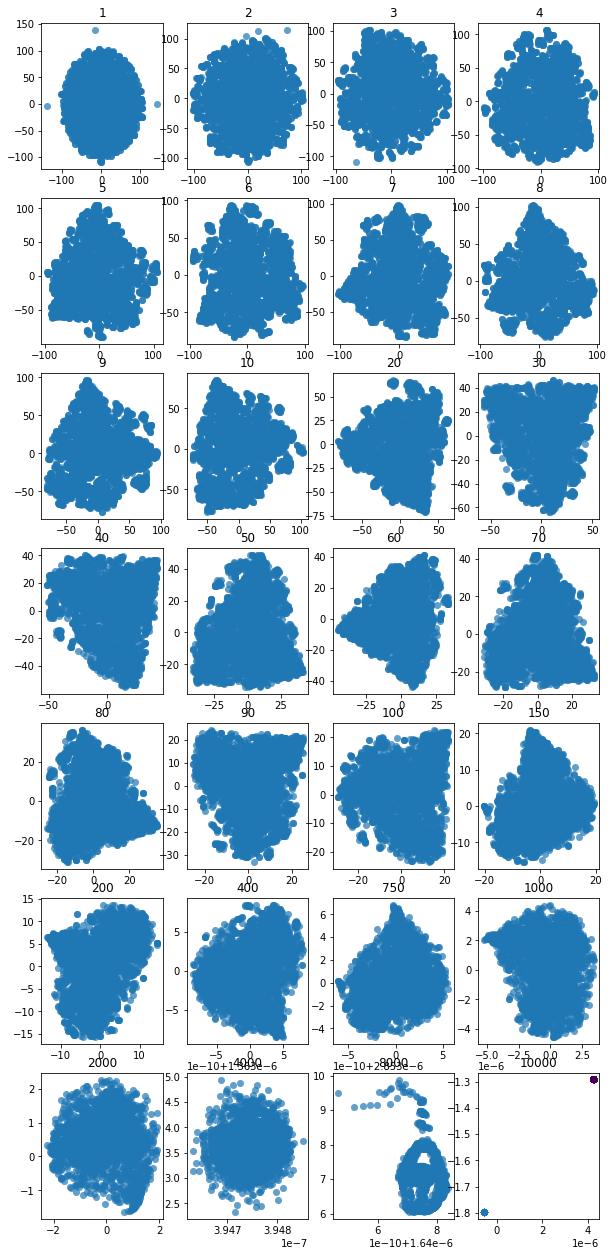

In [293]:
colnames = df.columns
df2 = pd.DataFrame(StandardScaler().fit_transform(df), columns=colnames).fillna(0)

perp_list = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,150,200,400,750,1000,2000,4000,8000,10000]

fig, axs =  plt.subplots(7, 4,figsize=(10,22))
axes = axs.ravel()

plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=200, lw=0, alpha=0.7, edgecolor='k',c=label)

for i,p in enumerate(perp_list):
  X_pca = TSNE(n_components=2,perplexity=p).fit_transform(df2)
  axes[i].scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=200, lw=0, alpha=0.7, edgecolor='k')
  axes[i].set_title(str(p))
plt.show()

In [0]:
clustering = DBSCAN(eps=10, min_samples=2).fit(X_pca)
label = clustering.labels_  
plot_by_label(X_pca,label,show=15,title='All the states')